### Multiple Linear regression


#### What is Muliiple linear regession

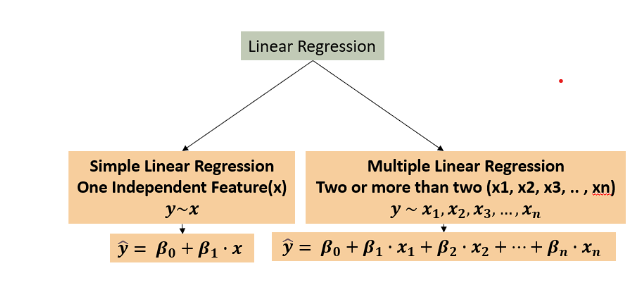

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
A = pd.read_csv('50_Startups.csv')


In [4]:
A.head

<bound method NDFrame.head of           RND      ADMIN        MKT       STATE     PROFIT
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  

### PROFIT(Y) ~ RND(X1), ADMIN(X2), MKT(X3)
PROFIT = B0 + B1xRND + B2xADMIN + B3xMKT

In [5]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
A.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [8]:
A.duplicated().sum()

0

### Seperating X and Y

In [9]:
X = A[['RND','ADMIN','MKT']]
S = A[['PROFIT']]

In [10]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
S.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,S)

LinearRegression()

### Check intercept and coefficients

In [13]:
model.intercept_

array([50122.19298987])

In [14]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [15]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

### PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT

In [17]:
coef = pd.Series(model.coef_.flatten())
coef.index = X.columns
coef

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: title={'center': 'Coefficent of Linear Reg'}>

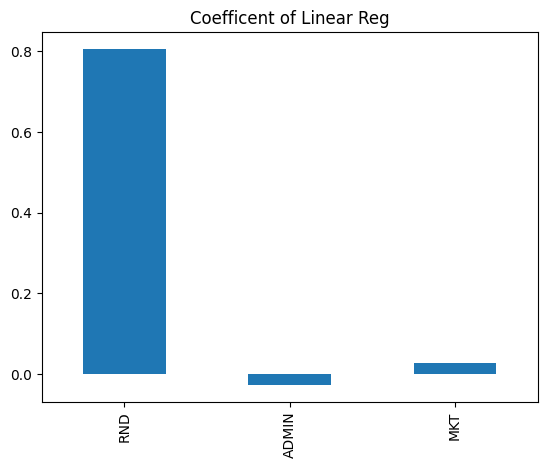

In [18]:
coef.plot(kind='bar',title='Coefficent of Linear Reg')

1. IF RND increases by 1000 , PROFIT increases by 805.7
2. IF ADMIN increase by 1000 , PROFIT decrease by 26.8
3. IF MKT increases by 1000, PROFIT increase by 27.2

### Evaluate the model

In [19]:
# R2 score
model.score(X, S)

0.9507459940683246

### Predict the results for X

In [20]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [21]:
S.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### MSE, RMSE, MAE, R2

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
mse = mean_squared_error(S, ypred)
mse

78417126.0191308

In [26]:
rmse = mse**(1/2)
rmse

8855.344489015139

In [27]:
mae = mean_absolute_error(S, ypred)
mae

6471.450396104808

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(S, ypred)
mape

0.10601209160494124

In [30]:
from sklearn.metrics import r2_score
r2 = r2_score(S, ypred)
r2

0.9507459940683246

### Above model is good and can be used out of sample predictions

In [31]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [32]:
xnew = [[100000, 30000, 50000]]
model.predict(xnew)

array([[131250.62216964]])

In [33]:
xnew = [[100000, 30000, 70000]]
model.predict(xnew)

array([[131795.18346565]])

### Higher Spend in RND more will the profit for given startup